In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

ModuleNotFoundError: No module named 'pandas'

# Importing the necessary libraries

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os

AttributeError: module 'scipy' has no attribute '_lib'

In [21]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return (data)            
    #return np.array(data)

# Loading the Dataset

In [ ]:
from datos import *
train = get_training_data('train_dir')
test = get_training_data('test_dir')
val = get_training_data('val_dir')
'''
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')
'''

"\ntrain = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')\ntest = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')\nval = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')\n"

# Data Visualization & Preprocessing

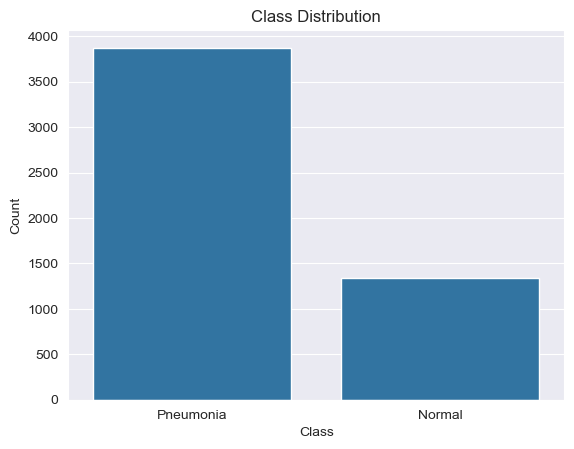

In [43]:
df = pd.DataFrame(train, columns=['Image', 'Label'])

df['Class'] = df['Label'].map({0: 'Pneumonia', 1: 'Normal'})

sns.set_style('darkgrid')
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()            

In [44]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [45]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [46]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [47]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

# Training the Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
'''
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
'''
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1), padding= 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same'))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu', padding= 'same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 82944)             0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [49]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs =50 , validation_data = datagen.flow(x_val, y_val) )

Epoch 1/50
163/163 [==============================] - 95s 551ms/step - loss: 0.5011 - accuracy: 0.7613 - val_loss: 0.7028 - val_accuracy: 0.7500
Epoch 2/50
163/163 [==============================] - 90s 552ms/step - loss: 0.3550 - accuracy: 0.8347 - val_loss: 0.9174 - val_accuracy: 0.7500
Epoch 3/50
163/163 [==============================] - 90s 553ms/step - loss: 0.3159 - accuracy: 0.8614 - val_loss: 0.7439 - val_accuracy: 0.8750
Epoch 4/50
163/163 [==============================] - 88s 535ms/step - loss: 0.2951 - accuracy: 0.8738 - val_loss: 1.5055 - val_accuracy: 0.6250
Epoch 5/50
163/163 [==============================] - 87s 530ms/step - loss: 0.2657 - accuracy: 0.8861 - val_loss: 1.7229 - val_accuracy: 0.5625
Epoch 6/50
163/163 [==============================] - 85s 523ms/step - loss: 0.2524 - accuracy: 0.8934 - val_loss: 0.5845 - val_accuracy: 0.7500
Epoch 7/50
163/163 [==============================] - 86s 526ms/step - loss: 0.2358 - accuracy: 0.9036 - val_loss: 0.7284 - val_ac

# Analysis after Model Training

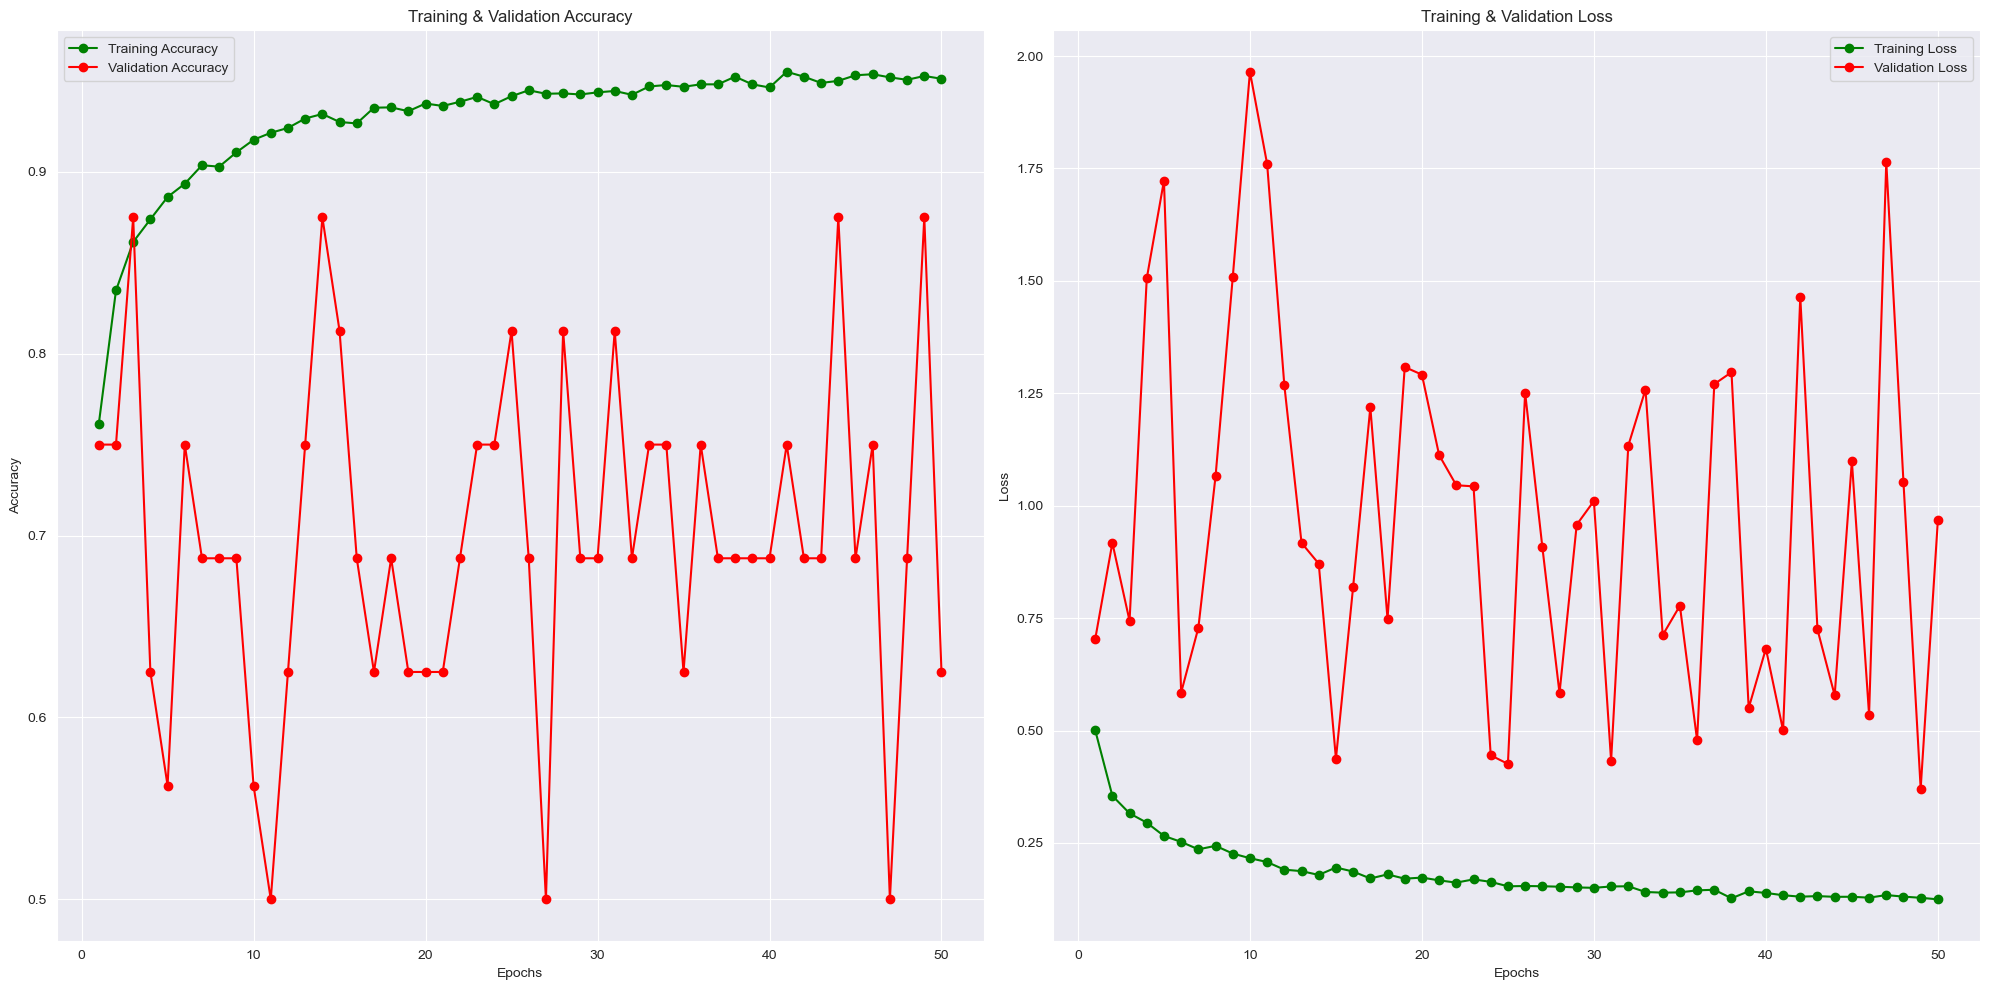

In [50]:
epochs = list(range(1, len(history.history['accuracy']) + 1))

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Create a figure
plt.figure(figsize=(20, 10))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(epochs, train_acc, 'go-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(epochs, train_loss, 'g-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-o', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

In [51]:
## Predict : 
predictions = model.predict(x_test)
predictions = np.where(predictions>0.5,1,0)
#print(predictions,y_test)

20/20 [==============================] - 5s 152ms/step


In [52]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.85      0.98      0.91       390
   Normal (Class 1)       0.96      0.71      0.82       234

           accuracy                           0.88       624
          macro avg       0.91      0.85      0.87       624
       weighted avg       0.89      0.88      0.88       624



In [53]:
cm = confusion_matrix(y_test,predictions)
cm

array([[383,   7],
       [ 67, 167]], dtype=int64)

In [54]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<Axes: >

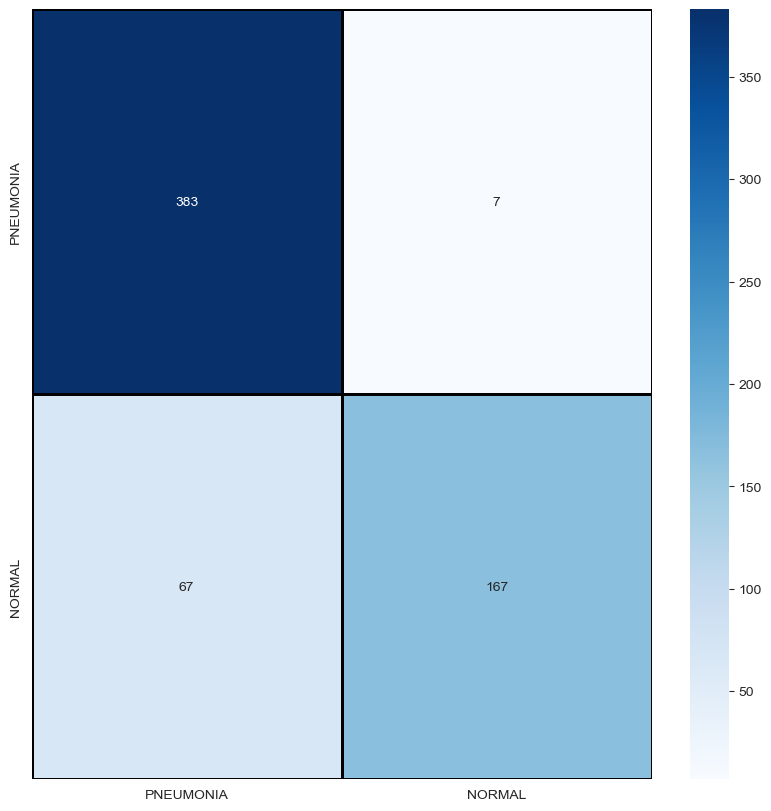

In [55]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)